In [26]:
# Imports and plotting setups
import pandas as pd
import numpy as np
np.set_printoptions(threshold=np.inf)
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import math

import sys, os
sys.path.insert(0, '../../')
sys.path.insert(0, '../')

import math_funcs

from cycler import cycler

default_cycler = (cycler(color=['#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377', 'black']) +
                cycler(linestyle=['-', '--', ':', '-.', '-', '--', ':']))

plt.rc('lines', linewidth=1)
plt.rc('axes', prop_cycle=default_cycler)

plt.rcParams["font.family"] = "Times"
plt.rcParams["font.size"] = 8

plt.rcParams['figure.figsize'] = (3.5, 2.5)
plt.rcParams['figure.dpi'] = 200

plt.rcParams['text.usetex'] = False

from scipy.constants import (
    epsilon_0,   # Permittivity of free space (vacuum)
    mu_0,        # Permeability of free space (vacuum)
    c,           # Speed of light in vacuum
    #e,           # Elementary charge
    #h,           # Planck constant
    #hbar,        # Reduced Planck constant (h-bar)
    k,           # Boltzmann constant
    #G,           # Newtonian constant of gravitation
    #m_e,         # Electron mass
    #m_p,         # Proton mass
    #m_n,         # Neutron mass
    #alpha,       # Fine-structure constant
    eV,          # Electron volt
)

# Example usage of some constants
print(f"Permittivity of free space: {epsilon_0} F/m")
print(f"Permeability of free space: {mu_0} N/A^2")
print(f"Speed of light in vacuum: {c} m/s")
# print(f"Elementary charge: {e} C")
# print(f"Planck constant: {h} J·s")
# print(f"Reduced Planck constant: {hbar} J·s")
print(f"Boltzmann constant: {k} J/K")
# print(f"Newtonian constant of gravitation: {G} m^3/kg/s^2")
# print(f"Electron mass: {m_e} kg")
# print(f"Proton mass: {m_p} kg")
# print(f"Neutron mass: {m_n} kg")
# print(f"Fine-structure constant: {alpha}")
print(f"Electron volt: {eV} J")

def print_engineering_notation(value):
    """
    Print a value in engineering notation (powers of ten in multiples of 3).

    Parameters:
    value (float): The value to be printed in engineering notation.
    """
    
    if value == 0:
        print("0")
        return

    exponent = int(math.floor(math.log10(abs(value)) / 3) * 3)
    mantissa = value / (10 ** exponent)
    
    print(f"{mantissa:.3f}e{exponent}")

# Example usage
print_engineering_notation(0)          # Output: 0
print_engineering_notation(1234.56)    # Output: 1.235e3
print_engineering_notation(0.00123456) # Output: 1.235e-3
print_engineering_notation(-987654)    # Output: -987.654e3
print_engineering_notation(1e9)        # Output: 1.000e9

Permittivity of free space: 8.8541878128e-12 F/m
Permeability of free space: 1.25663706212e-06 N/A^2
Speed of light in vacuum: 299792458.0 m/s
Boltzmann constant: 1.380649e-23 J/K
Electron volt: 1.602176634e-19 J
0
1.235e3
1.235e-3
-987.654e3
1.000e9


In [2]:
# some_file.py
import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, '..')

import antenna_toolbox as ant

array([4.4940321])

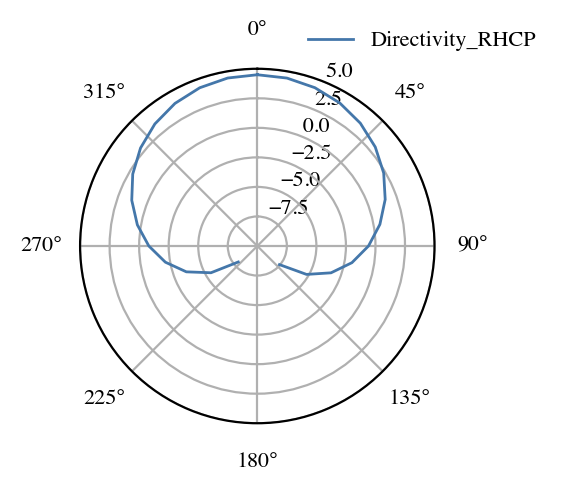

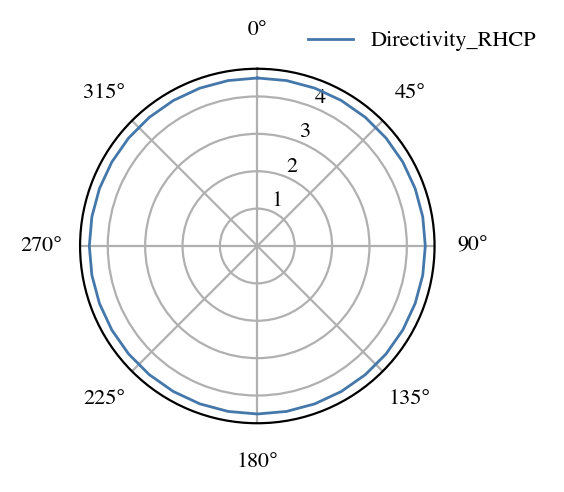

In [27]:
df = pd.read_csv("UHF Circularly polarized Directivity Plot 1.csv")

frequency = [413e6] # Hz
theta = df['Theta [deg]'].values[::10] # deg
phi = np.arange(0, 370, 10) # deg # deg, taking only the zeroth value because

theta_rad = np.radians(theta)
phi_rad = np.radians(phi)

dir_rhcp = df['dB(DirRHCP) []'].values[::10]
dir_rhcp = np.repeat(dir_rhcp[None, ..., None], len(phi), axis=-1)

dir_lhcp = df['dB(DirLHCP) []'].values[::10]
dir_lhcp = np.repeat(dir_lhcp[None, ..., None], len(phi), axis=-1)

uhf_patch_antenna = ant.pattern(
    Directivity_RHCP = dir_lhcp,
    Directivity_LHCP = dir_rhcp,
    frequency = frequency,
    theta = theta,
    phi = phi
)

frequency = uhf_patch_antenna.data_array.coords['frequency'].values[0]
display(uhf_patch_antenna.find_max('Directivity_RHCP'))
plt.figure()
ant.plot.polar_phi_cut(uhf_patch_antenna, ['Directivity_RHCP'], frequency, 0)
plt.ylim(-10, 5)
plt.figure()
ant.plot.polar_theta_cut(uhf_patch_antenna, ['Directivity_RHCP'], frequency, 0)

In [31]:
10**(uhf_patch_antenna.data_array.values[0, 0, 0:19, :]/10)

array([[2.81451268e+00, 2.81451268e+00, 2.81451268e+00, 2.81451268e+00,
        2.81451268e+00, 2.81451268e+00, 2.81451268e+00, 2.81451268e+00,
        2.81451268e+00, 2.81451268e+00, 2.81451268e+00, 2.81451268e+00,
        2.81451268e+00, 2.81451268e+00, 2.81451268e+00, 2.81451268e+00,
        2.81451268e+00, 2.81451268e+00, 2.81451268e+00, 2.81451268e+00,
        2.81451268e+00, 2.81451268e+00, 2.81451268e+00, 2.81451268e+00,
        2.81451268e+00, 2.81451268e+00, 2.81451268e+00, 2.81451268e+00,
        2.81451268e+00, 2.81451268e+00, 2.81451268e+00, 2.81451268e+00,
        2.81451268e+00, 2.81451268e+00, 2.81451268e+00, 2.81451268e+00,
        2.81451268e+00],
       [2.77452095e+00, 2.77452095e+00, 2.77452095e+00, 2.77452095e+00,
        2.77452095e+00, 2.77452095e+00, 2.77452095e+00, 2.77452095e+00,
        2.77452095e+00, 2.77452095e+00, 2.77452095e+00, 2.77452095e+00,
        2.77452095e+00, 2.77452095e+00, 2.77452095e+00, 2.77452095e+00,
        2.77452095e+00, 2.77452095e+00,

,D_tot,D_cond,D_brittle,D_conv,T_s,T_c,T_phi,T_m,T_cond_base,f_s,phi
0,52524.343686,19652.276968,9901.964298,32872.066718,103.224660,259.829666,161.196013,269.647516,250.011816,0.035121,0.020495
1,25438.836245,6441.246164,2411.726223,18997.590081,111.436384,262.343327,151.306719,272.458814,252.227839,0.005670,0.017310
2,26856.884986,8668.588738,3332.621207,18188.296249,104.980896,260.314629,146.804097,269.493984,251.135274,0.036730,0.234079
3,47514.391587,36123.491891,16560.897085,11390.899696,103.998037,263.013590,156.513683,272.364452,253.662728,0.006658,0.088147
4,131800.146593,43912.992968,18311.955417,87887.153625,97.348413,263.057008,145.245374,271.989634,254.124383,0.010585,0.071664
...,...,...,...,...,...,...,...,...,...,...,...
7191199,80438.401186,12706.028033,5148.974330,67732.373153,102.891544,260.574804,147.729305,269.949236,251.200371,0.031960,0.206531
7191200,52941.890702,14604.958940,5505.076159,38336.931762,102.963781,260.523691,144.118639,269.791116,251.256266,0.033617,0.152253
7191201,29776.576156,6546.992092,3302.724041,23229.584064,101.869183,259.364446,160.133541,269.013710,249.715181,0.041761,0.078308
7191202,22170.544565,19866.316590,8714.842096,2304.227975,92.914423,258.211937,143.130810,267.624517,248.799358,0.056315,0.124728
